### Name:
Remember to include your name in the filename as well. 

# Skills Test 2

## Part 1: Multiple Choice
Notice some of these questions require more than 1 answer. 

     1. In which cases would you expect penalized regression to be a better choice than boosted trees? (Type out all the letters corresponding to points that are true in the answer space).
         a. Lots of rows relative to the number of columns
         b. The best possible decision boundary is a straight line
         c. Lots more columns than rows
         d. The best possible decision boundary is jagged and non-linear
         
         Answer: 

- 1
> b,c

    
     2. In which cases would suspect that Lasso Regression would outperform Ridge Regression?
      (Type out all the letters corresponding to points that are true in the answer space).
        a. When it gives better performance on cross validated data
        b. To select a group of collinear varibles that have a large affect on the outcome
        c. Selecting a single variable that has a large affect on the outcome
        
        Answer: 

- 2
> a,c

        
    3. Why would we need to use basis expansion? What are different ways that you can perform basis expansion? (Type out all the letters corresponding to points that are true in the answer space).
        a. Fitting a linear model to non-linear data
        b. For extracting variable importances 
        c. Adding squared and cubed terms to a linear model 
        d. For removing collinear data from the dataset
        
        Answer: 

- 3
> a, c

       
     4. What is the bias/variance trade off (Choose one) 
        a.  The trade off between interpretability of a model and how well it performs
        b.  The trade off between how well a model fits to the training and testing data
        c.  The trade off between having less or more features included in your model
        
        Answer: 

- 4
> b

      
     5. MSE and R^2 - Interpret these metrics. What types of models are these appropriate for? 
      (Type out all the letters corresponding to points that are true in the answer space)
        a. They are used to measure success of a classification model
        b. They are used to measure success of a regression model
        c. MSE is a value between 0 and 1
        d. R^2 is a value between 0 and 1
        e. MSE corresponds to the amount of variance that is being captured by the model 
        f. MSE corresponds to the average for the square of the deviations

        Answer:

- 5
> b, d, e, f

    6.  Derive and write the cost function for Logistic Regression using LaTex

$ h(Xi) = \frac{1}{ 1+ e ^{-(XiBi)}} $

Cost Function:  $ C(Bi) = \frac{-1}{m} \sum _{i{\mathop {=}}1}^{m}yi*log(h(Xi)) + (1-Yi)log(1-h(Xi)) $

- solve for **log(h(xi))**: $ log(\frac{1}{ 1+ e ^{-(XiBi)}}) => log(1) - log({ 1+ e ^{-(XiBi)}}) = >**-log({ 1+ e ^{-(XiBi)}})** $
- solve for **log(1-H(xi))**: $ log( 1 - \frac{1}{ 1+ e ^{-(XiBi)}}) => log [ (\frac{{ 1+ e ^{-(XiBi)}}}{{ 1+ e ^{-(XiBi)}}) }  - \frac {1} { 1+ e ^{-(XiBi)}}] => log[ \frac {e ^{-(XiBi)}} { 1+ e ^{-(XiBi)}}] = > ** -BiXi - log({ 1+ e ^{-(XiBi)}})** $


- Plug these solutions into the original Cost Function


Updated Cost Function:  $ C(Bi) = \frac{-1}{m} \sum _{i{\mathop {=}}1}^{m}-yi*log({ 1+ e ^{-(XiBi)}}) + (1-Yi)(-XiBi - log({ 1+ e ^{-(XiBi)}}) $

- Simplify the cost function using the fact that 1+e^x ~ e^x and combining the XiBi terms

$ C(Bi) = \frac{-1}{m} \sum _{i{\mathop {=}}1}^{m} (yi*XiBi -XiBi - log({ 1+ e ^{-(XiBi)}}) $

- Using the fact that: $ -XiBi - log({ 1+ e ^{-(XiBi)}}) =  log({ 1+ e ^{-(XiBi)}}) $

$ C(Bi) = \frac{-1}{m} \sum _{i{\mathop {=}}1}^{m} (yi*XiBi -log({ 1+ e ^{-(XiBi)}}) $

- Now take the partial derivative of the Cost Function with respect to the weights (Bi)

$\frac{{\partial C}}{{\partial Bi}} = \frac{-1}{m}\sum [ YiXi +  \frac {e ^{-(XiBi)}*(XiBi)}{ 1+ e ^{(XiBi)}} ] $

    7. Define the following terms pertaining to confusion matrices and provide formulas for each (using TP, TN, FP, FN). What situations do each of these quantities correspond with given that you are trying to predict whether or not a patient has cancer (you can skip the F1 statistic). For example, accuracy corresponds to the fraction of all the medical cases that we predicted correctly. 
    
        * Accuracy - 
        * Precision - 
        * Recall - 
        * F1 Statistic - 
        * Type I Error - 
        * Type II Error - 
        
       What part of the confusion matrix represents Type I and Type II errors?

- Accuracy: The number of correct terms over the total number of terms. (TP+FP) / (TP+FP+FP+FN)
- Precision:  is the measure of reproducibility of a given medical test on the same patient (i.e. achieve the same result after running a test multiple times).  (TP) / (TP+FN)
- Recall: Is the neumber of relevant tests (i.e. tests that help diagnose a patients condition) over all of the tests run. TP / (TP+FP) 
- F1 Statistic: ${\displaystyle F_{1}\cdot {\frac {1}{{\tfrac {1}{\mathrm {recall} }}+{\tfrac {1}{\mathrm {precision} }}}}}.$ The overall effectiveness of a suite of tests given to a patient to asses his/her condition.
- Type 1 Error: This is the probability of incorrectly rejecting the null hypothesis. FP / (TN+FP). The probability that the doctor said the patient was sick when the patient was healthy.
- Type II Error: This is the probability of failing to reject the null hypothesis. FN / (FN+TP). The probability that the doctor said the patient was healthy when the patient was actually sick. 
- Type I error in a confusion matrix (matrix A) ( prediction on top vs actual on the rows) is the  A01 / (A00 + A01)
- Type II error in a confusion matrix (matrix B) is B10 / (B10 + B11)

## Part 2: Building a Model

# Wine Quality Modeling

Use **ensembles of trees** (Random Forest and Gradient Boosting) to build a good model for the <a href = 
'https://archive.ics.uci.edu/ml/datasets/Wine+Quality'>wine quality dataset</a>. Make the required parametric adjustments to get the best performance from each model. Report the final MSE and R^2. **Extract and compare** the variable importances generated by each model. We are not going to hold your hand here. Use whatever tools/visuals you need to help you come up with the best model possible. 

In [24]:
import pandas as pd
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics  import r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
#import the data
whitewine_df = pd.read_csv('winequality-white.csv',delimiter=';')

In [12]:
#inspect the data
whitewine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
# get the columns labels
wine_columns = whitewine_df.columns[:-1]
wine_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [14]:
whitewine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [15]:
whitewine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
X = np.array(whitewine_df.iloc[:,:-1])
y = np.array(whitewine_df.iloc[:,-1:])

In [17]:
# train test split

X_train, X_test, y_train, y_test  = train_test_split(X,y)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [8]:
#First, use random forest with random search for best params

In [11]:
random_forest_parameters = {'n_estimators':[i for i in range(1,500)],'max_depth':[i for i in range(1,500)],\
                            'min_samples_split':[i for i in range(2,50)],\
                            'min_samples_leaf':[i for i in range(1,50)],\
                            'max_features':['auto','sqrt','log2'],\
                            'max_leaf_nodes':[i for i in range(2,500,1)]}

In [24]:
random_search = RandomizedSearchCV(RandomForestRegressor(),random_forest_parameters,cv=3,n_iter=100,scoring = 'neg_mean_squared_error',verbose=1)

In [25]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69...25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, sco

In [26]:
# Best estimator from randomized CV
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=345,
           max_features='sqrt', max_leaf_nodes=335,
           min_impurity_split=1e-07, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [37]:
# Now , use gridsearch to find the best parameters around the ones randomized search found

random_forest_grid = {'bootstrap':['True'],'criterion':['mse'], 'max_depth':[i for i in range(340,350)],'max_features':['sqrt'],\
            'max_leaf_nodes':[i for i in range(330,340)],\
                      'min_samples_leaf':[i for i in range(2,4)],\
           'min_samples_split':[i for i in range(7,10)],'n_estimators':[i for i in range(85,95)]}

In [38]:
grid_search_RF = GridSearchCV(RandomForestRegressor(),random_forest_grid,cv=2,scoring = 'neg_mean_squared_error',verbose=1)

In [39]:
grid_search_RF.fit(X_train,y_train)

Fitting 2 folds for each of 9000 candidates, totalling 18000 fits


[Parallel(n_jobs=1)]: Done 18000 out of 18000 | elapsed: 93.3min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse'], 'max_depth': [340, 341, 342, 343, 344, 345, 346, 347, 348, 349], 'max_features': ['sqrt'], 'bootstrap': ['True'], 'n_estimators': [85, 86, 87, 88, 89, 90, 91, 92, 93, 94], 'max_leaf_nodes': [330, 331, 332, 333, 334, 335, 336, 337, 338, 339], 'min_samples_split': [7, 8, 9], 'min_samples_leaf': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [73]:
print( 'These are the best parameters for Random Forest',grid_search_RF.best_estimator_)

These are the best parameters for Random Forest RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=348,
           max_features='sqrt', max_leaf_nodes=333,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           n_estimators=89, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [59]:
#COmpare best parameters with default parameters
best_random_forest = RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=348,
           max_features='sqrt', max_leaf_nodes=333,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=7, min_weight_fraction_leaf=0.0,
           n_estimators=89, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
default_random_forest = RandomForestRegressor()

In [60]:
best_random_forest.fit(X_train,y_train)
default_random_forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

# Compare MSE from optimal RF and default RF on test and train data.

In [90]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics  import r2_score
top_features = best_random_forest.feature_importances_
top_features_sorted = sorted(top_features, reverse=True)
print('MSE (Test) for optimal Random Forest Parameters: {}'.format(mean_squared_error(y_test,best_random_forest.predict(X_test))))
print('R_2 (Test) for optimal Random Forest Parameters: {:.2%}'.format(r2_score(y_test , best_random_forest.predict(X_test))))
print('MSE (Training) for optimal Random Forest Parameters: {}'.format(mean_squared_error(y_train,best_random_forest.predict(X_train))))
print('R_2 (Training) for optimal Random Forest Parameters: {:.2%}'.format(r2_score(y_train , best_random_forest.predict(X_train))))
print()
print('Top features for optimal RF')
print([(i,l) for i,l in zip(top_features_sorted,wine_columns[np.argsort(top_features)])])

MSE (Test) for optimal Random Forest Parameters: 0.3850340189423642
R_2 (Test) for optimal Random Forest Parameters: 49.48%
MSE (Training) for optimal Random Forest Parameters: 0.1788815608723825
R_2 (Training) for optimal Random Forest Parameters: 77.40%

Top features for optimal RF
[(0.18674401096615545, 'fixed acidity'), (0.12539720134793811, 'sulphates'), (0.10993007752029067, 'pH'), (0.10535345379022022, 'citric acid'), (0.083780168335381017, 'residual sugar'), (0.07329678383525759, 'total sulfur dioxide'), (0.071984921757565587, 'chlorides'), (0.065716070032036222, 'free sulfur dioxide'), (0.064773845711464037, 'volatile acidity'), (0.056782887696681515, 'density'), (0.056240579007009621, 'alcohol')]


In [91]:
top_features_d = default_random_forest.feature_importances_
top_features_sorted_d = sorted(top_features, reverse=True)

print('MSE (Test) for default Random Forest Parameters: {}'.format(mean_squared_error(y_test,default_random_forest.predict(X_test))))
print('R_2 (Test) for default Random Forest Parameters: {:.2%}'.format(r2_score(y_test , default_random_forest.predict(X_test))))
print('MSE (Training) for default Random Forest Parameters: {}'.format(mean_squared_error(y_train,default_random_forest.predict(X_train))))
print('R_2 (Training) for default Random Forest Parameters: {:.2%}'.format(r2_score(y_train , default_random_forest.predict(X_train))))


print()
print('Top features for deafult RF')
print([(i,l) for i,l in zip(top_features_sorted_d,wine_columns[np.argsort(top_features)])])

MSE (Test) for default Random Forest Parameters: 0.396734693877551
R_2 (Test) for default Random Forest Parameters: 47.95%
MSE (Training) for default Random Forest Parameters: 0.07704873400490063
R_2 (Training) for default Random Forest Parameters: 90.26%

Top features for deafult RF
[(0.18674401096615545, 'fixed acidity'), (0.12539720134793811, 'sulphates'), (0.10993007752029067, 'pH'), (0.10535345379022022, 'citric acid'), (0.083780168335381017, 'residual sugar'), (0.07329678383525759, 'total sulfur dioxide'), (0.071984921757565587, 'chlorides'), (0.065716070032036222, 'free sulfur dioxide'), (0.064773845711464037, 'volatile acidity'), (0.056782887696681515, 'density'), (0.056240579007009621, 'alcohol')]


> The optimal RF model produces a 2.78% lower MSE compared to the default parameters. The most important features are 1) Fixed acidity 2) Sulphates 3) pH . 

# Next, Gradient Boosting on the white wine dataset.

In [92]:
GradientBoostingRegressor()

sklearn.ensemble.gradient_boosting.GradientBoostingRegressor

In [116]:
gradient_boost_parameters = {'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[i for i in np.linspace(.001,.8,20)],\
                            'n_estimators':[i for i in range(50,500,10)], 'criterion':['friedman_mse'],\
                            'min_samples_split':[i for i in range(2,20)], 'min_samples_leaf':[i for i in range(1,20)],\
                            'max_depth':[i for i in range(1,50)],'subsample':[i for i in np.linspace(.001,1,30)],\
                              'alpha':[i for i in np.linspace(.001,.99,30)],'max_features':['auto','sqrt','log2']}

In [117]:
gradient_random_search = RandomizedSearchCV(GradientBoostingRegressor(),gradient_boost_parameters,n_iter=100,verbose=1)

In [118]:
gradient_random_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'criterion': ['friedman_mse'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'learning_rate': [0.001, 0.04305263157894737, ...62068965511, 0.86220689655172411, 0.89665517241379311, 0.93110344827586211, 0.965551724137931, 1.0]},
          pre_dispatch='2*n_j

In [119]:
gradient_random_search.best_estimator_

GradientBoostingRegressor(alpha=0.88768965517241383, criterion='friedman_mse',
             init=None, learning_rate=0.04305263157894737, loss='huber',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=6,
             min_samples_split=17, min_weight_fraction_leaf=0.0,
             n_estimators=470, presort='auto', random_state=None,
             subsample=0.75886206896551722, verbose=0, warm_start=False)

In [5]:
best_gradient_search = GradientBoostingRegressor(alpha=0.88768965517241383, criterion='friedman_mse',
             init=None, learning_rate=0.04305263157894737, loss='huber',
             max_depth=20, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=6,
             min_samples_split=17, min_weight_fraction_leaf=0.0,
             n_estimators=470, presort='auto', random_state=None,
             subsample=0.75886206896551722, verbose=0, warm_start=False)

In [120]:
default_gradient_search = GradientBoostingRegressor()

In [123]:
best_gradient_search.fit(X_train,y_train)
default_gradient_search.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [136]:
#Top features from optimal gradient_search
top_features = best_gradient_search.feature_importances_
top_features_sorted = sorted(top_features, reverse=True)
print('MSE (Test) for optimal Gradient Boost Parameters: {}'.format(mean_squared_error(y_test,best_gradient_search.predict(X_test))))
print('R_2 (Test) for optimal Gradient Boost Parameters: {:.2%}'.format(r2_score(y_test , best_gradient_search.predict(X_test))))
print('MSE (Training) for optimal Gradient Boost Parameters: {}'.format(mean_squared_error(y_train,best_gradient_search.predict(X_train))))
print('R_2 (Training) for optimal Gradient Boost Parameters: {:.2%}'.format(r2_score(y_train , best_gradient_search.predict(X_train))))
print()
print('Top features for optimal Gradient Boost')
print([(i,l) for i,l in zip(top_features_sorted,wine_columns[np.argsort(top_features)[::-1]])])

MSE (Test) for optimal Gradient Boost Parameters: 0.34666758683238624
R_2 (Test) for optimal Gradient Boost Parameters: 54.52%
MSE (Training) for optimal Gradient Boost Parameters: 0.01596919104136864
R_2 (Training) for optimal Gradient Boost Parameters: 97.98%

Top features for optimal Gradient Boost
[(0.11731126313227053, 'total sulfur dioxide'), (0.099941114170622888, 'free sulfur dioxide'), (0.097284767715744125, 'density'), (0.093960396173075472, 'residual sugar'), (0.091788446471496005, 'pH'), (0.090276037121821862, 'chlorides'), (0.086489814267343354, 'volatile acidity'), (0.084795433578980006, 'sulphates'), (0.083641815432960981, 'alcohol'), (0.078926396683801012, 'citric acid'), (0.075584515251883769, 'fixed acidity')]


In [137]:
#Default Gradient Search
top_features = best_gradient_search.feature_importances_
top_features_sorted = sorted(top_features, reverse=True)
print('MSE (Test) for default Gradient Boost Parameters: {}'.format(mean_squared_error(y_test,default_gradient_search.predict(X_test))))
print('R_2 (Test) for default Gradient Boost Parameters: {:.2%}'.format(r2_score(y_test , default_gradient_search.predict(X_test))))
print('MSE (Training) for default Gradient Boost Parameters: {}'.format(mean_squared_error(y_train,default_gradient_search.predict(X_train))))
print('R_2 (Training) for default Gradient Boost Parameters: {:.2%}'.format(r2_score(y_train , default_gradient_search.predict(X_train))))
print()
print('Top features for default Gradient Boost')
print([(i,l) for i,l in zip(top_features_sorted,wine_columns[np.argsort(top_features)[::-1]])])

MSE (Test) for default Gradient Boost Parameters: 0.4449806315561436
R_2 (Test) for default Gradient Boost Parameters: 41.62%
MSE (Training) for default Gradient Boost Parameters: 0.4008639077309373
R_2 (Training) for default Gradient Boost Parameters: 49.35%

Top features for default Gradient Boost
[(0.11731126313227053, 'total sulfur dioxide'), (0.099941114170622888, 'free sulfur dioxide'), (0.097284767715744125, 'density'), (0.093960396173075472, 'residual sugar'), (0.091788446471496005, 'pH'), (0.090276037121821862, 'chlorides'), (0.086489814267343354, 'volatile acidity'), (0.084795433578980006, 'sulphates'), (0.083641815432960981, 'alcohol'), (0.078926396683801012, 'citric acid'), (0.075584515251883769, 'fixed acidity')]


> For Gradient Boosting, the optimal model improves MSE by 22%. In addition, the most important variables are 1) fixed acidity 2) citric acid 3) alcohol . This differes from RF where the to three features are 1) Fixed Acidity 2) sulphates 3) pH. This difference is due to how these models are built, Gradient Boosting uses the gradient of the loss function while adaptive boosting assigns weights to both the weak learners and the individual data points within the weak learners. 

In [8]:
### Gradient Boosting Graphs and tuning

In [86]:
gdb= GradientBoostingRegressor()
gdb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [18]:
X_train, X_test, y_train, y_test  = train_test_split(X,y)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [60]:
gdb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [58]:
len(y_test)

1225

In [130]:
def stage_score_plot(model, train_x, train_y, test_x, test_y,learn_rate=None):
    """predict MSE from training and testing data over each gradient fold"""
    model.fit(train_x,train_y)
    train_error = np.zeros((len(list(model.staged_predict(train_x)))))
    test_error = np.zeros((len(list(model.staged_predict(test_x)))))
    for i, mse in enumerate(model.staged_predict(train_x)):
        train_error[i] =mean_squared_error(train_y,mse)
    for i, mse in enumerate(model.staged_predict(test_x)):
        test_error[i] =mean_squared_error(test_y,mse)
    plt.plot([i for i in range(len(list(model.staged_predict(train_x))))],test_error,label='test -learning rate {} '.format(learn_rate))
    plt.plot([i for i in range(len(list(model.staged_predict(train_x))))],train_error, label='train -learning rate {}'.format(learn_rate))
    plt.ylabel("MSE")
    plt.xlabel('Iterations')
    plt.legend()
    plt.title('MSE over Iterations')
    print('Min MSE train:',min(train_error))
    print('Min MSE test:',min(test_error))

Gradient Boost with default parameters
Min MSE train: 0.40044316998
Min MSE test: 0.454619489239


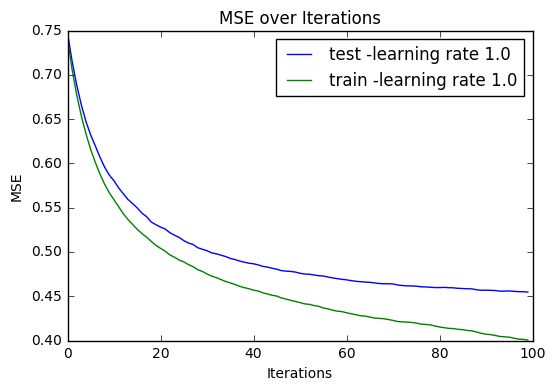

In [117]:
print('Gradient Boost with default parameters')
stage_score_plot(gdb, X_train, y_train, X_test, y_test, 1.0)

- From the default parameters, it seems that the MSE levels out around .4 for the train error, but we may need to increase the number of trees built to determine where it asymptotes.

Gradient Boost with 3000 trees, learning rate of 1.0
Min MSE train: 4.26273146948e-06
Min MSE test: 0.521096404362


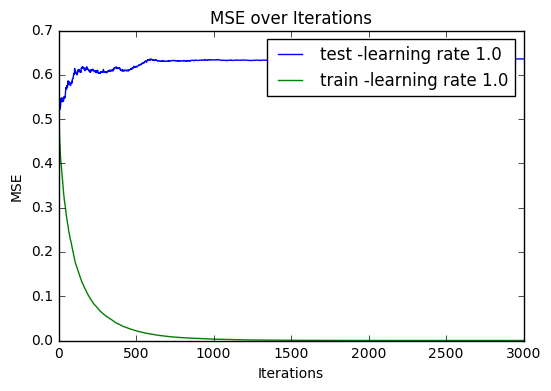

In [118]:
print('Gradient Boost with 3000 trees, learning rate of 1.0')
gb2 = GradientBoostingRegressor(learning_rate=1.0,n_estimators=3000)
stage_score_plot(gb2, X_train, y_train, X_test, y_test, 1.0)

- Train error goes to zero around 1,200 iterations (this is our optimal parameter then). Next adjust our learning rate.

Gradient Boost with 1200 trees, learning rate of .9
Min MSE train: 0.0017823977154
Min MSE test: 0.506128806086


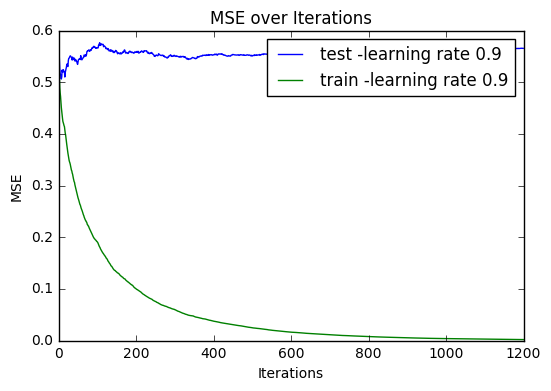

In [119]:
print('Gradient Boost with 1200 trees, learning rate of .9')
gb3 = GradientBoostingRegressor(learning_rate=.9,n_estimators=1200)
stage_score_plot(gb3, X_train, y_train, X_test, y_test, .9)

- reduce again


Gradient Boost with 1200 trees, learning rate of .5
Min MSE train: 0.00901741449542
Min MSE test: 0.46496093504


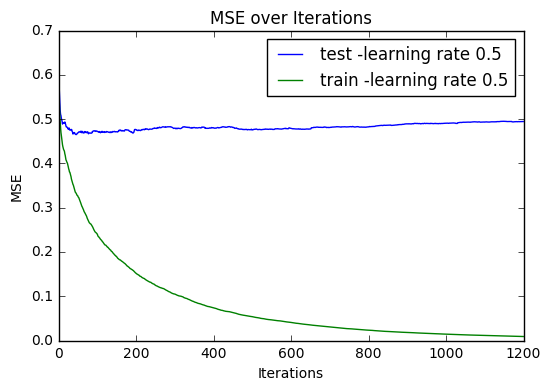

In [120]:
print('Gradient Boost with 1200 trees, learning rate of .5')
gb4 = GradientBoostingRegressor(learning_rate=.5,n_estimators=1200)
stage_score_plot(gb4, X_train, y_train, X_test, y_test, .5)

- Looking better, let's try even smaller.

Gradient Boost with 1200 trees, learning rate of .2
Min MSE train: 0.0536676364012
Min MSE test: 0.438509861743


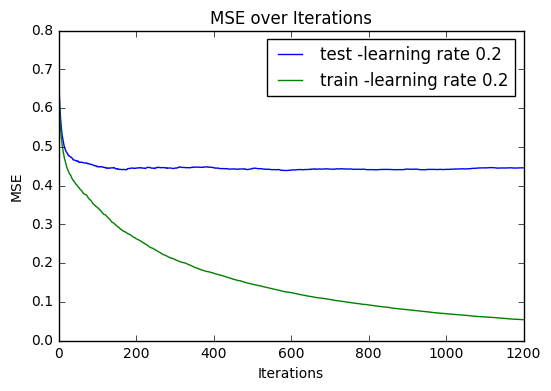

In [121]:
print('Gradient Boost with 1200 trees, learning rate of .2')
gb5 = GradientBoostingRegressor(learning_rate=.2,n_estimators=1200)
stage_score_plot(gb5, X_train, y_train, X_test, y_test, .2)

- One more

Gradient Boost with 1200 trees, learning rate of .1
Min MSE train: 0.125635353268
Min MSE test: 0.436167550797


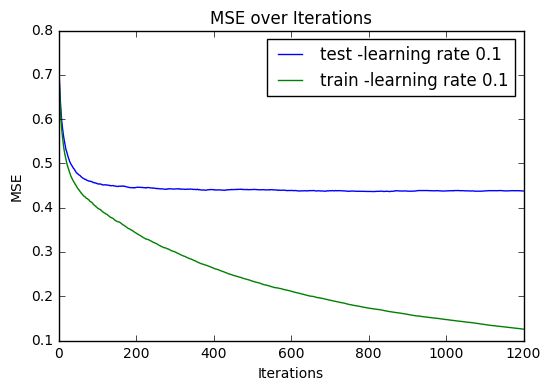

In [122]:
print('Gradient Boost with 1200 trees, learning rate of .1')
gb6 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1200)
stage_score_plot(gb6, X_train, y_train, X_test, y_test, .1)

- Alright, bse MSE around .45. Next, adjust max depth.

Gradient Boost with 1200 trees, learning rate of .1, max depth of 1
Min MSE train: 0.456795218827
Min MSE test: 0.479117438574


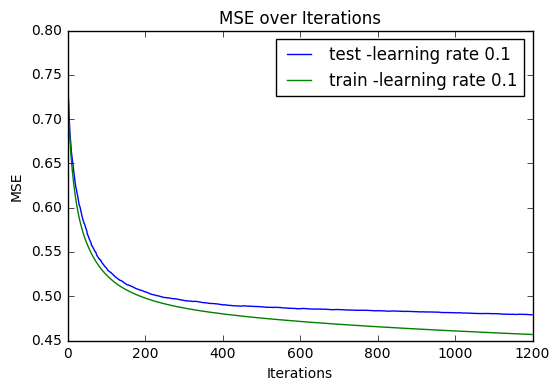

In [123]:
print('Gradient Boost with 1200 trees, learning rate of .1, max depth of 1')
gb7 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1200,max_depth=1)
stage_score_plot(gb7, X_train, y_train, X_test, y_test, .1)

- Slightly worse

Gradient Boost with 1200 trees, learning rate of .1, max depth of 2
Min MSE train: 0.287148108257
Min MSE test: 0.443689189472


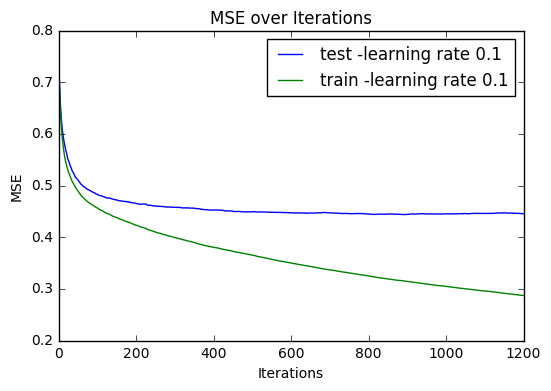

In [124]:
print('Gradient Boost with 1200 trees, learning rate of .1, max depth of 2')
gb8 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1200,max_depth=2)
stage_score_plot(gb8, X_train, y_train, X_test, y_test, .1)

- getting better

Gradient Boost with 1200 trees, learning rate of .1, max depth of 5
Min MSE train: 0.00361499501373
Min MSE test: 0.390345830069


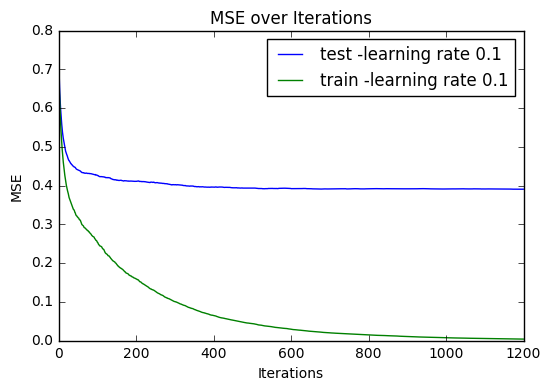

In [125]:
print('Gradient Boost with 1200 trees, learning rate of .1, max depth of 5')
gb7 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1200,max_depth=5)
stage_score_plot(gb7, X_train, y_train, X_test, y_test, .1)

- It keeps improving, let's try a much higher max depth.

Gradient Boost with 1200 trees, learning rate of .1, max depth of 10
Min MSE train: 9.98813999867e-08
Min MSE test: 0.401785916868


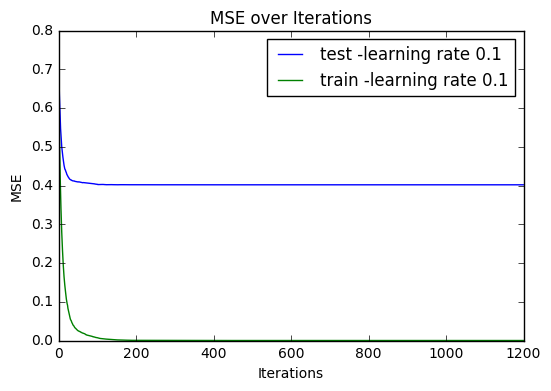

In [126]:
print('Gradient Boost with 1200 trees, learning rate of .1, max depth of 10')
gb8 = GradientBoostingRegressor(learning_rate=.1,n_estimators=1200,max_depth=10)
stage_score_plot(gb8, X_train, y_train, X_test, y_test, .1)

> We get under .4 MSE for our test data with max-depth = 5. 
- Min MSE test: 0.390345830069

> Compare to the results from randomized grid search. 
- MSE (Test) for optimal Gradient Boost Parameters: 0.34666758683238624
- R_2 (Test) for optimal Gradient Boost Parameters: 54.52%
- MSE (Training) for optimal Gradient Boost Parameters: 0.01596919104136864
- R_2 (Training) for optimal Gradient Boost Parameters: 97.98%

In [1]:
import xgboost

In [5]:
m = xgboost

In [ ]:
m.train()